# Consultation des données

In [28]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Connexion à la base de données DuckDB
con = duckdb.connect(
    r"C:\Users\yacin\OneDrive\Documents\GitHub\13_pollution_eau\data.duckdb"
)

# Lister les tables disponibles dans la base de données
tables = con.execute("SHOW TABLES").fetchall()

# Afficher la liste des tables
print("Tables disponibles dans la base de données DuckDB:")
for table in tables:
    print(table[0])

Tables disponibles dans la base de données DuckDB:
edc_communes
edc_prelevements
edc_resultats


In [15]:
# charger la table edc_communes dans DataFrame
df_comm = con.execute("SELECT *FROM edc_communes").fetchdf()
print("premières lignes de la edc_communes")
df_comm

premières lignes de la edc_communes


,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim,de_partition,de_ingestion_date
0,01001,ABERGEMENT-CLEMENCIAT (L'),-,001000556,BDS ST DIDIER/CHALARONNE,2010-09-07,2024,2025-02-12
1,01002,ABERGEMENT-DE-VAREY (L'),-,001000369,L'ABERGEMENT-DE-VAREY,2010-09-07,2024,2025-02-12
2,01004,AMBERIEU-EN-BUGEY,Vareilles,001000248,AMBERIEU VAREILLES,2010-09-07,2024,2025-02-12
3,01004,AMBERIEU-EN-BUGEY,St Germain_Brédevent,001000249,AMBERIEU SAINT GERMAIN DOUVRES,2010-09-07,2024,2025-02-12
4,01004,AMBERIEU-EN-BUGEY,ville,001000251,AMBERIEU VILLE,2010-09-07,2024,2025-02-12
...,...,...,...,...,...,...,...,...
49531,97617,TSINGONI,MIRERENI VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49532,97617,TSINGONI,MROUALE VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49533,97617,TSINGONI,TSINGONI CENTRE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49534,97701,SAINT-BARTHELEMY,Toute la commune,971000159,SAINT-BARTHELEMY,2010-10-19,2024,2025-02-12


#### Analyse des colonnes :
- inseecommune : Code INSEE de la commune (clé de jointure principale).
- nomcommune : Nom de la commune.
- quartier : Quartier ou sous-division dans la commune.
- cdreseau : Code réseau de distribution d’eau (UDI ?).
- nomreseau : Nom du réseau de distribution d’eau.
- debutalim : Date de début d’alimentation par le réseau.

In [16]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49536 entries, 0 to 49535
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   inseecommune       49536 non-null  object        
 1   nomcommune         49536 non-null  object        
 2   quartier           49536 non-null  object        
 3   cdreseau           49536 non-null  object        
 4   nomreseau          49536 non-null  object        
 5   debutalim          49536 non-null  datetime64[us]
 6   de_partition       49536 non-null  int32         
 7   de_ingestion_date  49536 non-null  datetime64[us]
dtypes: datetime64[us](2), int32(1), object(5)
memory usage: 2.8+ MB


## Analyse de la variable "inseecommune"

In [17]:
# Identifier les valeurs contenant des caractères non numériques
non_numeric = df_comm[df_comm["inseecommune"].str.contains(r"\D", na=False)]
non_numeric.head()

# il somble que les codes sont des codes qui correspondent au commune Corse

,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim,de_partition,de_ingestion_date
14947,2A001,AFA,AFA,02A000933,GRAND AJACCIO,2016-02-08,2024,2025-02-12
14948,2A001,AFA,Village,02A000967,AFA VILLAGE,2010-07-15,2024,2025-02-12
14949,2A004,AJACCIO,Ville,02A000933,GRAND AJACCIO,2010-07-15,2024,2025-02-12
14950,2A004,AJACCIO,Aéroport,02A004178,AEROPORT NAPOLEON BONAPARTE,2021-08-19,2024,2025-02-12
14951,2A004,AJACCIO,Gare maritime,02A004184,GARE MARITIME AJACCIO,2021-08-19,2024,2025-02-12


##### Filtrer et supprimer les communes de Corse

In [18]:
# Supprimer les communes Corse (codes INSEE commençant par '2A' ou '2B')
df_cleaned = df_comm[~df_comm["inseecommune"].str.startswith(("2A", "2B"))]

# Vérification du nombre de lignes restantes
print(f"Nombre de lignes après suppression des communes Corse : {len(df_cleaned)}")

# Convertir la colonne 'inseecommune' en entier (en s'assurant que toutes les valeurs sont bien des chiffres)
df_cleaned["inseecommune"] = pd.to_numeric(df_cleaned["inseecommune"], errors="coerce")

# Vérification du type de la colonne après conversion
df_cleaned.dtypes

Nombre de lignes après suppression des communes Corse : 48845


C:\Users\yacin\AppData\Local\Temp\ipykernel_33340\3999757425.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["inseecommune"] = pd.to_numeric(df_cleaned["inseecommune"], errors="coerce")


inseecommune                  int64
nomcommune                   object
quartier                     object
cdreseau                     object
nomreseau                    object
debutalim            datetime64[us]
de_partition                  int32
de_ingestion_date    datetime64[us]
dtype: object

### Analyse quartiers et communes

In [19]:
# Détection des communes avec plusieurs quartiers
communes_multi_quartiers = df_cleaned.groupby("nomcommune").filter(
    lambda x: x["quartier"].nunique() > 1
)
print("Communes avec plusieurs quartiers :")
communes_multi_quartiers

Communes avec plusieurs quartiers :


,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim,de_partition,de_ingestion_date
2,1004,AMBERIEU-EN-BUGEY,Vareilles,001000248,AMBERIEU VAREILLES,2010-09-07,2024,2025-02-12
3,1004,AMBERIEU-EN-BUGEY,St Germain_Brédevent,001000249,AMBERIEU SAINT GERMAIN DOUVRES,2010-09-07,2024,2025-02-12
4,1004,AMBERIEU-EN-BUGEY,ville,001000251,AMBERIEU VILLE,2010-09-07,2024,2025-02-12
5,1005,AMBERIEUX-EN-DOMBES,Est,001000850,BDS CHATANIER,2023-01-01,2024,2025-02-12
6,1005,AMBERIEUX-EN-DOMBES,Ouest,001000850,BDS CHATANIER,2021-08-01,2024,2025-02-12
...,...,...,...,...,...,...,...,...
49531,97617,TSINGONI,MIRERENI VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49532,97617,TSINGONI,MROUALE VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49533,97617,TSINGONI,TSINGONI CENTRE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-12
49534,97701,SAINT-BARTHELEMY,Toute la commune,971000159,SAINT-BARTHELEMY,2010-10-19,2024,2025-02-12


In [20]:
# Vérification des codes réseau uniques par commune et quartier
codes_reseau_doublons = (
    df_cleaned.groupby(["nomcommune", "quartier"])["cdreseau"].nunique().reset_index()
)
print("\nNombre de codes réseau uniques par quartier :")
codes_reseau_doublons.head()


Nombre de codes réseau uniques par quartier :


,nomcommune,quartier,cdreseau
0,AAST,-,1
1,ABAINVILLE,-,1
2,ABANCOURT,-,2
3,ABAUCOURT,-,1
4,ABAUCOURT-HAUTECOURT,-,1


## Étape 1 : Statistiques sur les quartiers et les codes réseau

#### A voir 
-  Nombre total de communes
- Nombre de communes avec plusieurs quartiers
- Nombre moyen de quartiers par commune
- Fréquence des codes réseau (cdreseau) : unique ou partagé ?

In [21]:
# Nombre total de communes
total_communes = df_cleaned["inseecommune"].nunique()

# Nombre de communes avec plusieurs quartiers
communes_avec_quartiers = df_cleaned[df_cleaned["quartier"] != "-"][
    "nomcommune"
].nunique()

# Nombre moyen de quartiers par commune
quartiers_par_commune = (
    df_cleaned[df_cleaned["quartier"] != "-"]
    .groupby("nomcommune")["quartier"]
    .nunique()
    .mean()
)

# Fréquence des codes réseau (unique ou partagé dans la même commune)
codes_reseau_counts = df_cleaned.groupby(["nomcommune", "quartier"])[
    "cdreseau"
].nunique()
codes_reseau_partages = codes_reseau_counts[codes_reseau_counts > 1].count()

# Résultats
print(f"Nombre total de communes : {total_communes}")
print(f"Nombre de communes avec plusieurs quartiers : {communes_avec_quartiers}")
print(f"Nombre moyen de quartiers par commune : {quartiers_par_commune:.2f}")
print(f"Nombre de quartiers avec codes réseau partagés : {codes_reseau_partages}")


Nombre total de communes : 34449
Nombre de communes avec plusieurs quartiers : 12373
Nombre moyen de quartiers par commune : 1.86
Nombre de quartiers avec codes réseau partagés : 2301


#### Visualisations : 

- Graphique à barres : Nombre de quartiers par commune (uniquement pour les communes avec plusieurs quartiers).
- Diagramme en camembert (pie chart) : Proportion des codes réseau (cdreseau) partagés vs uniques.
- Histogramme : Répartition du nombre de quartiers par commune.

C:\Users\yacin\AppData\Local\Temp\ipykernel_33340\4207679782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["nomcommune"] = df_cleaned["nomcommune"].str.strip().str.upper()
C:\Users\yacin\AppData\Local\Temp\ipykernel_33340\4207679782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["quartier"] = df_cleaned["quartier"].replace("-", "Aucun").str.strip()


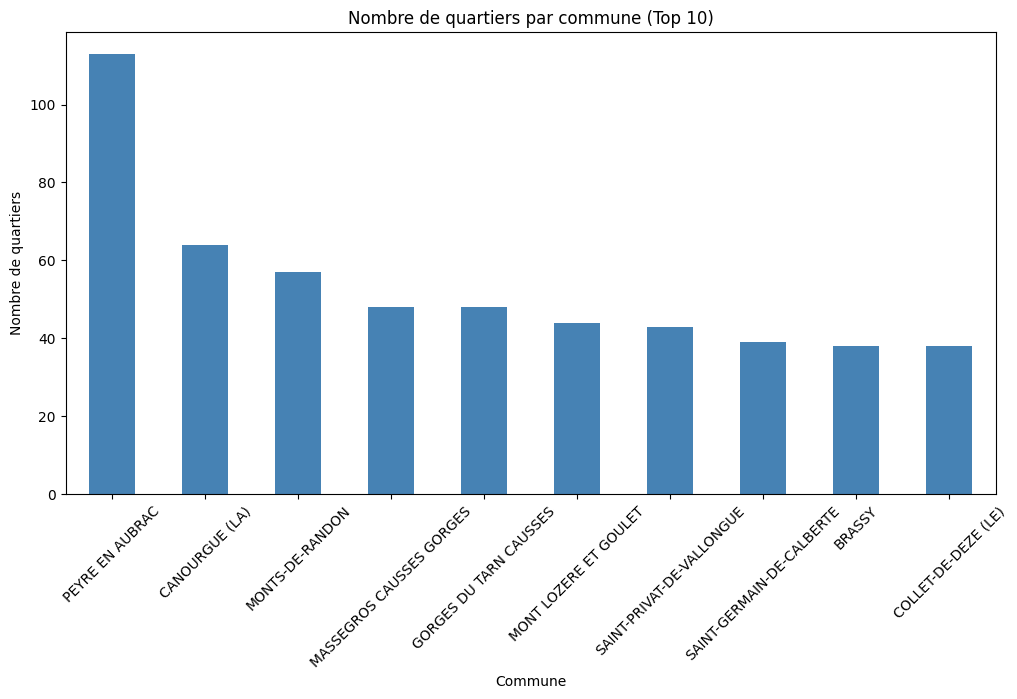

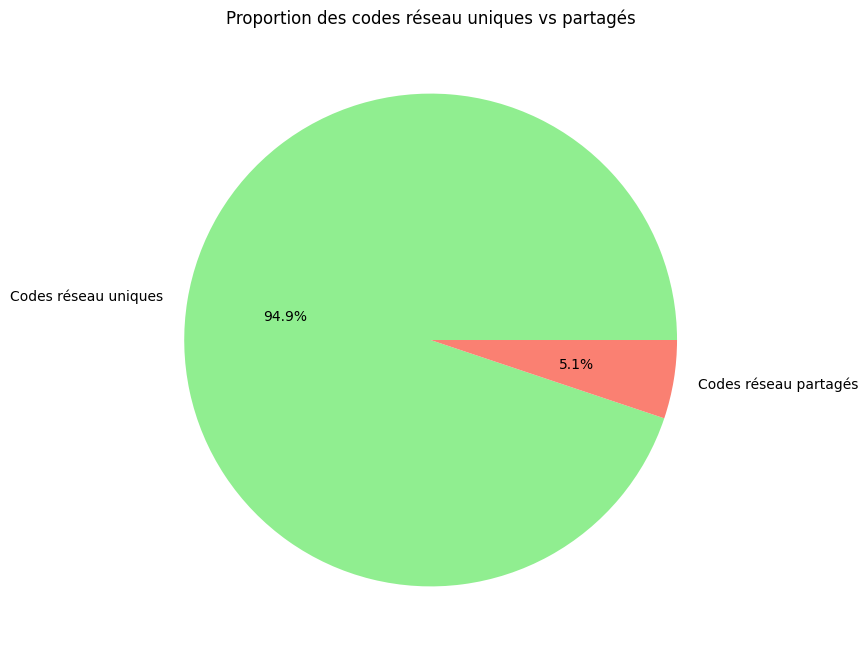

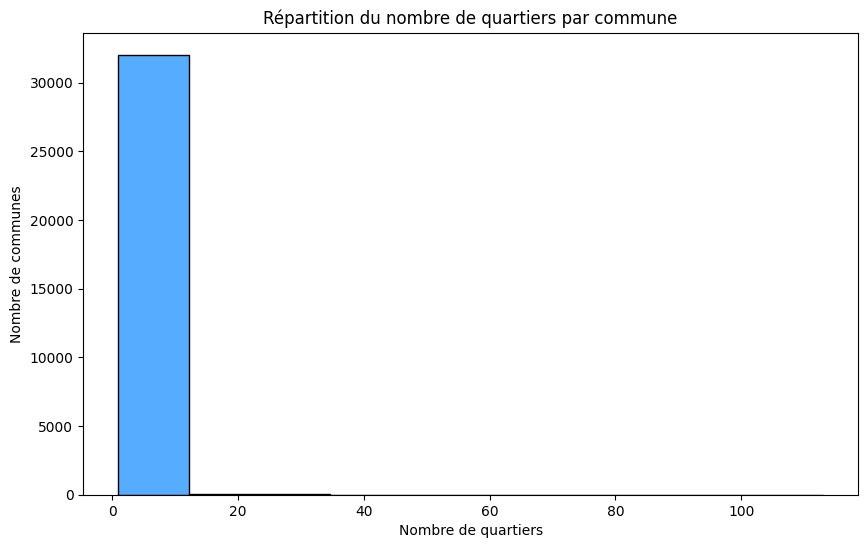

In [29]:
# Nettoyage et préparation des données
df_cleaned["nomcommune"] = df_cleaned["nomcommune"].str.strip().str.upper()
df_cleaned["quartier"] = df_cleaned["quartier"].replace("-", "Aucun").str.strip()

# 1. Nombre de quartiers par commune (bar chart)
quartiers_count = (
    df_cleaned[df_cleaned["quartier"] != "AUCUN"]
    .groupby("nomcommune")["quartier"]
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
quartiers_count.head(10).plot(kind="bar", color="steelblue")
plt.title("Nombre de quartiers par commune (Top 10)")
plt.xlabel("Commune")
plt.ylabel("Nombre de quartiers")
plt.xticks(rotation=45)
plt.show()

# 2. Proportion des codes réseau uniques vs partagés (pie chart)
codes_reseau_counts = df_cleaned.groupby(["nomcommune", "quartier"])[
    "cdreseau"
].nunique()
partages = codes_reseau_counts[codes_reseau_counts > 1].count()
uniques = codes_reseau_counts[codes_reseau_counts == 1].count()

plt.figure(figsize=(8, 8))
plt.pie(
    [uniques, partages],
    labels=["Codes réseau uniques", "Codes réseau partagés"],
    autopct="%1.1f%%",
    colors=["lightgreen", "salmon"],
)
plt.title("Proportion des codes réseau uniques vs partagés")
plt.show()

# 3. Histogramme : Répartition du nombre de quartiers par commune
plt.figure(figsize=(10, 6))
sns.histplot(quartiers_count, bins=10, kde=False, color="dodgerblue")
plt.title("Répartition du nombre de quartiers par commune")
plt.xlabel("Nombre de quartiers")
plt.ylabel("Nombre de communes")
plt.show()


## 1. Statistiques descriptives sur les codes réseau par commune

In [30]:
# Nombre de codes réseau par commune
codes_par_commune = df_cleaned.groupby("nomcommune")["cdreseau"].nunique()

# Statistiques descriptives
mean_codes = codes_par_commune.mean()
median_codes = codes_par_commune.median()
std_codes = codes_par_commune.std()
max_codes = codes_par_commune.max()

# Affichage des résultats
print(f"Moyenne de codes réseau par commune : {mean_codes:.2f}")
print(f"Médiane de codes réseau par commune : {median_codes}")
print(f"Écart-type de codes réseau par commune : {std_codes:.2f}")
print(f"Maximum de codes réseau pour une commune : {max_codes}")


Moyenne de codes réseau par commune : 1.42
Médiane de codes réseau par commune : 1.0
Écart-type de codes réseau par commune : 1.16
Maximum de codes réseau pour une commune : 24
